In [11]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("app_data.log") #location of log file

In [4]:
print(df.head(5))

         DATE      TIME APPLICATION
0  12-06-2023  12:05:01    nautilus
1  12-06-2023  12:05:03    nautilus
2  12-06-2023  12:05:04       gedit
3  12-06-2023  12:05:05       gedit
4  12-06-2023  12:05:06       gedit


# Data Cleaning

In [5]:
		"""Converting the data set into the fomat
		   DATE        START_TIME     END_TIME USAGE   APPLICATION
		   11-01-2022  11:49:42       11:50:33    52   thunar     """

# cleaned_app_data="clean_app_data.csv"    #name of file in which w'll store clean data
new_df = pd.DataFrame(columns=["DATE", "START_TIME", "END_TIME","USAGE","APPLICATION"])

def time_difference(time1, time2):
    """This funcation take 2 time as a parameter and returns total time differnce in seconds"""
    format_str = '%H:%M:%S'
    time_obj1 = datetime.strptime(time1, format_str)
    time_obj2 = datetime.strptime(time2, format_str)
    time_diff = time_obj2 - time_obj1
    return int(time_diff.total_seconds())

start_index=0                    #setting the index for the first data in new df and subsequently to set the starting time of application further
# last_row_index = df.index[-1]    #fetches the last row of df
try:
    for index, row in df.iterrows():                                            #iterating through whole data set 
        if (df.loc[index,"APPLICATION"]!=df.loc[(index+1),"APPLICATION"]) or time_difference(df.loc[index,"TIME"], df.loc[(index+1),"TIME"]) > 5 or (df.loc[index,"DATE"]!=df.loc[(index+1),"DATE"]):
            # If it's a new application or time difference is >= 5 seconds or date is different, add the row to new_df
            new_df.loc[len(new_df)] = [df.loc[index,"DATE"],df.loc[start_index,"TIME"],df.loc[index,"TIME"],time_difference(df.loc[start_index,"TIME"], df.loc[index,"TIME"]),df.loc[index,"APPLICATION"]]   #appending data to new df
            start_index=index+1                                                   #setting the index for the next application start time
except:
    pass

print(new_df.head(25))
        

          DATE START_TIME  END_TIME  USAGE            APPLICATION
0   12-06-2023   12:05:01  12:05:03      2               nautilus
1   12-06-2023   12:05:04  12:05:07      3                  gedit
2   12-06-2023   12:05:08  12:05:08      0               nautilus
3   12-06-2023   12:05:09  12:05:10      1                    gjs
4   12-06-2023   12:05:11  12:05:17      6           sublime_text
5   12-06-2023   12:05:18  12:05:27      9                   Null
6   12-06-2023   12:05:28  12:06:45     77           sublime_text
7   12-06-2023   12:06:46  12:06:51      5  gnome-terminal-server
8   12-06-2023   12:06:52  12:06:58      6           sublime_text
9   12-06-2023   12:06:59  12:06:59      0  gnome-terminal-server
10  12-06-2023   12:07:00  12:07:52     52           sublime_text
11  12-06-2023   12:07:53  12:08:00      7               nautilus
12  12-06-2023   12:08:01  12:08:01      0                   Null
13  12-06-2023   12:08:02  12:08:14     12            soffice.bin
14  12-06-

# Show the pie chart of the current day computer usage in pie chart

In [7]:
# today = datetime.now().strftime("%d-%m-%Y")  #get's todays date
today="12-06-2023"
print(today)

12-06-2023


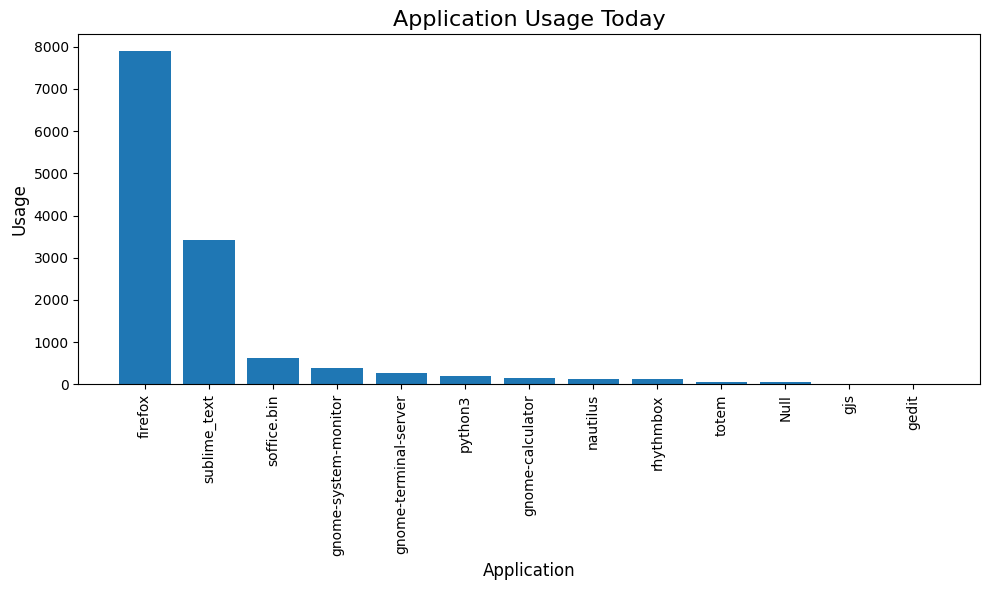

In [20]:
# today_data=df.loc[(df['DATE']==today)&(df['APPLICATION']!='xfdesktop'),['USAGE','APPLICATION']]
today_data=new_df.loc[(new_df['DATE']==today)&(new_df['APPLICATION']!='xfdesktop'),['USAGE','APPLICATION']] #gets all the log data which has today's date to make graph
# today_data
data=today_data.groupby('APPLICATION')['USAGE'].sum()   #groups the application based on categories
# print(data)
data=data.sort_values(ascending=False)                  #sorts the data
# print(data)
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.bar(data.index, data.values)

# Customize the plot
plt.title("Application Usage Today", fontsize=16)
plt.xlabel("Application", fontsize=12)
plt.ylabel("Usage", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()
